<a href="https://colab.research.google.com/github/aai510-group1/project/blob/main/project_paul.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from xgboost import XGBClassifier


# Load Dataset

In [2]:
# Load the Telco dataset
df = pd.read_csv('./Dataset/Telco_Customer_Churn.csv')
# drop customer id and location data

df.drop([
    'Customer ID',
    'Lat Long', 
    'Country', 
    'State', 
    'City', 
    'Zip Code', 
    ], axis=1, inplace=True)

# EDA

In [3]:
# Display the first 5 rows of the dataframe
print(df.head())

   Count   Latitude   Longitude  Gender Senior Citizen Partner Dependents  \
0      1  33.964131 -118.272783    Male             No      No         No   
1      1  34.059281 -118.307420  Female             No      No        Yes   
2      1  34.048013 -118.293953  Female             No      No        Yes   
3      1  34.062125 -118.315709  Female             No     Yes        Yes   
4      1  34.039224 -118.266293    Male             No      No        Yes   

   Tenure Months Phone Service Multiple Lines  ...        Contract  \
0              2           Yes             No  ...  Month-to-month   
1              2           Yes             No  ...  Month-to-month   
2              8           Yes            Yes  ...  Month-to-month   
3             28           Yes            Yes  ...  Month-to-month   
4             49           Yes            Yes  ...  Month-to-month   

  Paperless Billing             Payment Method Monthly Charges Total Charges  \
0               Yes               Ma

In [4]:
# Display the summary statistics of the dataframe
print(df.describe())

        Count     Latitude    Longitude  Tenure Months  Monthly Charges  \
count  7043.0  7043.000000  7043.000000    7043.000000      7043.000000   
mean      1.0    36.282441  -119.798880      32.371149        64.761692   
std       0.0     2.455723     2.157889      24.559481        30.090047   
min       1.0    32.555828  -124.301372       0.000000        18.250000   
25%       1.0    34.030915  -121.815412       9.000000        35.500000   
50%       1.0    36.391777  -119.730885      29.000000        70.350000   
75%       1.0    38.224869  -118.043237      55.000000        89.850000   
max       1.0    41.962127  -114.192901      72.000000       118.750000   

       Churn Value  Churn Score         CLTV  
count  7043.000000  7043.000000  7043.000000  
mean      0.265370    58.699418  4400.295755  
std       0.441561    21.525131  1183.057152  
min       0.000000     5.000000  2003.000000  
25%       0.000000    40.000000  3469.000000  
50%       0.000000    61.000000  4527.0000

In [5]:
# Display the information of the dataframe
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 27 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Count              7043 non-null   int64  
 1   Latitude           7043 non-null   float64
 2   Longitude          7043 non-null   float64
 3   Gender             7043 non-null   object 
 4   Senior Citizen     7043 non-null   object 
 5   Partner            7043 non-null   object 
 6   Dependents         7043 non-null   object 
 7   Tenure Months      7043 non-null   int64  
 8   Phone Service      7043 non-null   object 
 9   Multiple Lines     7043 non-null   object 
 10  Internet Service   7043 non-null   object 
 11  Online Security    7043 non-null   object 
 12  Online Backup      7043 non-null   object 
 13  Device Protection  7043 non-null   object 
 14  Tech Support       7043 non-null   object 
 15  Streaming TV       7043 non-null   object 
 16  Streaming Movies   7043 

In [6]:
# Check for missing values
print(df.isnull().sum())

Count                   0
Latitude                0
Longitude               0
Gender                  0
Senior Citizen          0
Partner                 0
Dependents              0
Tenure Months           0
Phone Service           0
Multiple Lines          0
Internet Service        0
Online Security         0
Online Backup           0
Device Protection       0
Tech Support            0
Streaming TV            0
Streaming Movies        0
Contract                0
Paperless Billing       0
Payment Method          0
Monthly Charges         0
Total Charges           0
Churn Label             0
Churn Value             0
Churn Score             0
CLTV                    0
Churn Reason         5174
dtype: int64


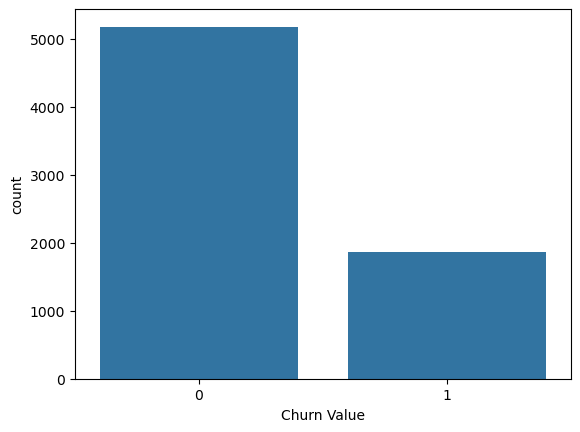

In [7]:
sns.countplot(x='Churn Value', data=df)
plt.show()

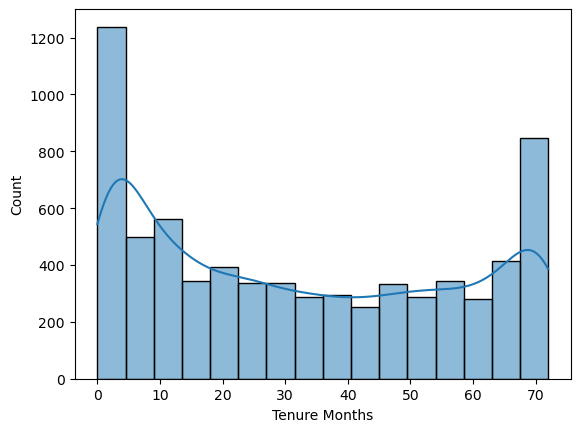

In [8]:
sns.histplot(df['Tenure Months'], kde=True)
plt.show()

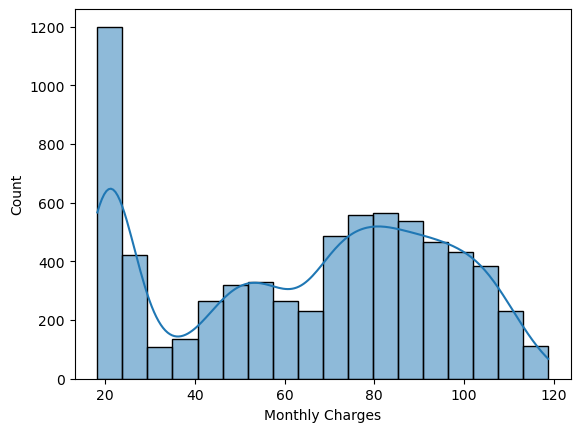

In [9]:
sns.histplot(df['Monthly Charges'], kde=True)
plt.show()

# Cleaning

In [10]:
# Convert boolean columns to 1/0, except for columns with three values
boolean_columns = [
    'Senior Citizen', 'Partner', 'Dependents', 'Phone Service',
    'Paperless Billing', 'Churn Label'
]

# double check that these columns only have two values
for column in boolean_columns:
    print(f'{column}: {df[column].unique()}')

for column in boolean_columns:
    df[column] = df[column].apply(lambda x: 1 if x == 'Yes' else 0)

for column in boolean_columns:
    print(f'{column}: {df[column].unique()}')

Senior Citizen: ['No' 'Yes']
Partner: ['No' 'Yes']
Dependents: ['No' 'Yes']
Phone Service: ['Yes' 'No']
Paperless Billing: ['Yes' 'No']
Churn Label: ['Yes' 'No']
Senior Citizen: [0 1]
Partner: [0 1]
Dependents: [0 1]
Phone Service: [1 0]
Paperless Billing: [1 0]
Churn Label: [1 0]


In [11]:
# Handle columns with three values
three_value_columns = [
    'Multiple Lines', 'Online Security', 'Online Backup',
    'Device Protection', 'Tech Support', 'Streaming TV', 'Streaming Movies'
]

# double check that these columns have three values
for column in three_value_columns:
    print(f'{column}: {df[column].unique()}')

for column in three_value_columns:
    df[column] = df[column].replace({
        'Yes': 1,
        'No': 0,
        'No internet service': -1,
        'No phone service': -1
    })

for column in three_value_columns:
    print(f'{column}: {df[column].unique()}')

Multiple Lines: ['No' 'Yes' 'No phone service']
Online Security: ['Yes' 'No' 'No internet service']
Online Backup: ['Yes' 'No' 'No internet service']
Device Protection: ['No' 'Yes' 'No internet service']
Tech Support: ['No' 'Yes' 'No internet service']
Streaming TV: ['No' 'Yes' 'No internet service']
Streaming Movies: ['No' 'Yes' 'No internet service']
Multiple Lines: [ 0  1 -1]
Online Security: [ 1  0 -1]
Online Backup: [ 1  0 -1]
Device Protection: [ 0  1 -1]
Tech Support: [ 0  1 -1]
Streaming TV: [ 0  1 -1]
Streaming Movies: [ 0  1 -1]


In [12]:
# Clean the 'Total Charges' column
df['Total Charges'] = pd.to_numeric(df['Total Charges'], errors='coerce')
df['Total Charges'].describe()

count    7032.000000
mean     2283.300441
std      2266.771362
min        18.800000
25%       401.450000
50%      1397.475000
75%      3794.737500
max      8684.800000
Name: Total Charges, dtype: float64

In [13]:
numeric_columns = df.select_dtypes(include=[float, int]).columns

# first show the number of missing values in each column
print(df[numeric_columns].isnull().sum())

# since Total Charges has missing values, we will fill them with 0
df['Total Charges'] = df['Total Charges'].fillna(0)

Count                 0
Latitude              0
Longitude             0
Senior Citizen        0
Partner               0
Dependents            0
Tenure Months         0
Phone Service         0
Multiple Lines        0
Online Security       0
Online Backup         0
Device Protection     0
Tech Support          0
Streaming TV          0
Streaming Movies      0
Paperless Billing     0
Monthly Charges       0
Total Charges        11
Churn Label           0
Churn Value           0
Churn Score           0
CLTV                  0
dtype: int64


In [14]:
df['Churn Reason'].describe()

count                           1869
unique                            20
top       Attitude of support person
freq                             192
Name: Churn Reason, dtype: object

In [15]:
# Encode categorical variables using get_dummies
categorical_columns = ['Gender', 'Contract', 'Payment Method', 'Internet Service']
data_encoded_large = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

In [16]:
data_encoded_large.describe()

,Count,Latitude,Longitude,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Online Security,...,Tech Support,Streaming TV,Streaming Movies,Paperless Billing,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV
count,7043.0,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,...,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,1.0,36.282441,-119.798880,0.162147,0.483033,0.231010,32.371149,0.903166,0.325004,0.069999,...,0.073548,0.167684,0.171234,0.592219,64.761692,2279.734304,0.265370,0.265370,58.699418,4400.295755
std,0.0,2.455723,2.157889,0.368612,0.499748,0.421508,24.559481,0.295752,0.642730,0.706051,...,0.708201,0.756958,0.758507,0.491457,30.090047,2266.794470,0.441561,0.441561,21.525131,1183.057152
min,1.0,32.555828,-124.301372,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,0.000000,18.250000,0.000000,0.000000,0.000000,5.000000,2003.000000
25%,1.0,34.030915,-121.815412,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,35.500000,398.550000,0.000000,0.000000,40.000000,3469.000000
50%,1.0,36.391777,-119.730885,0.000000,0.000000,0.000000,29.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,70.350000,1394.550000,0.000000,0.000000,61.000000,4527.000000
75%,1.0,38.224869,-118.043237,0.000000,1.000000,0.000000,55.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,89.850000,3786.600000,1.000000,1.000000,75.000000,5380.500000
max,1.0,41.962127,-114.192901,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,118.750000,8684.800000,1.000000,1.000000,100.000000,6500.000000


In [17]:
# Define the feature matrix (X) and the target vector (y)
X = data_encoded_large.drop(columns=[
     'Churn Label', 
     'Churn Value',
     'Churn Score',
     'CLTV',
     'Churn Reason',
     ])
y = data_encoded_large['Churn Value']

In [18]:
# list all of the X feature types to verify that they are all numeric
print(X.dtypes)

Count                                       int64
Latitude                                  float64
Longitude                                 float64
Senior Citizen                              int64
Partner                                     int64
Dependents                                  int64
Tenure Months                               int64
Phone Service                               int64
Multiple Lines                              int64
Online Security                             int64
Online Backup                               int64
Device Protection                           int64
Tech Support                                int64
Streaming TV                                int64
Streaming Movies                            int64
Paperless Billing                           int64
Monthly Charges                           float64
Total Charges                             float64
Gender_Male                                  bool
Contract_One year                            bool


# Baseline Model

In [19]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
def fit_predict_evaluate(model, X_train, y_train, X_test, y_test):
    # Fit the model
    model.fit(X_train, y_train)

    # Predict the target vector
    y_pred = model.predict(X_test)

    # Evaluate the model
    print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
    print(f'Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}')
    print(f'Classification Report:\n{classification_report(y_test, y_pred)}')

## Logistic Regression

In [20]:
model = LogisticRegression(max_iter=1000)
fit_predict_evaluate(model, X_train, y_train, X_test, y_test)

Accuracy: 0.8019872249822569
Confusion Matrix:
[[907 102]
 [177 223]]
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1009
           1       0.69      0.56      0.62       400

    accuracy                           0.80      1409
   macro avg       0.76      0.73      0.74      1409
weighted avg       0.79      0.80      0.80      1409



## XGBoost

In [21]:
model = XGBClassifier()
fit_predict_evaluate(model, X_train, y_train, X_test, y_test)

Accuracy: 0.7856635911994322
Confusion Matrix:
[[894 115]
 [187 213]]
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1009
           1       0.65      0.53      0.59       400

    accuracy                           0.79      1409
   macro avg       0.74      0.71      0.72      1409
weighted avg       0.78      0.79      0.78      1409



In [22]:
# Try Random Forest
model = RandomForestClassifier()
fit_predict_evaluate(model, X_train, y_train, X_test, y_test)

Accuracy: 0.8005677785663591
Confusion Matrix:
[[914  95]
 [186 214]]
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1009
           1       0.69      0.54      0.60       400

    accuracy                           0.80      1409
   macro avg       0.76      0.72      0.74      1409
weighted avg       0.79      0.80      0.79      1409



## XGBoost hyperparameter

In [24]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'learning_rate': [0.1, 0.01, 0.001],
    'max_depth': [3, 5, 7, 10],
    'n_estimators': [100, 200, 500],
    # 'tree_method': ['gpu_hist']  # Use GPU accelerated algorithm
}

# Initialize the XGBoost classifier
model = XGBClassifier()

# Initialize the GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, scoring='f1_macro')

# Fit the data to the GridSearchCV
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_

print(f'Best parameters: {best_params}')
# Best parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}
best_params = {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}

# Initialize the XGBoost classifier with the best parameters
model = XGBClassifier(**best_params)

fit_predict_evaluate(model, X_train, y_train, X_test, y_test)

Best parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}
Accuracy: 0.8005677785663591
Confusion Matrix:
[[914  95]
 [186 214]]
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1009
           1       0.69      0.54      0.60       400

    accuracy                           0.80      1409
   macro avg       0.76      0.72      0.74      1409
weighted avg       0.79      0.80      0.79      1409



## Random forest hyper parameter

In [25]:
# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 500, 1000],
    'max_features': ['auto', 'sqrt'],
    'max_depth': [10, 20, 30, 40, 50, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Initialize the RandomForestClassifier
model = RandomForestClassifier()

# Initialize the GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, scoring='f1_macro', n_jobs=-1, verbose=2)

# Fit the data to the GridSearchCV
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_

print(f'Best parameters: {best_params}')

# Best parameters: {'bootstrap': True, 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 500}
best_params = {'bootstrap': True, 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 500}

# Initialize the RandomForestClassifier with the best parameters
model = RandomForestClassifier(**best_params)

fit_predict_evaluate(model, X_train, y_train, X_test, y_test)

Fitting 3 folds for each of 864 candidates, totalling 2592 fits


C:\Users\paula\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
1296 fits failed out of a total of 2592.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
560 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\paula\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\paula\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py", line 1145, in wrapper
    estimator._validate_params()
  File "C:\Users\paula\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py", line 638, in _validate_params
    valida

Best parameters: {'bootstrap': True, 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 500}
Accuracy: 0.8069552874378992
Confusion Matrix:
[[919  90]
 [182 218]]
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1009
           1       0.71      0.55      0.62       400

    accuracy                           0.81      1409
   macro avg       0.77      0.73      0.74      1409
weighted avg       0.80      0.81      0.80      1409



# Best Model

Use Synthetic Minority Oversampling Technique to accound for imbalanced dataset

In [28]:
# Try smote
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

model = RandomForestClassifier(**best_params)
fit_predict_evaluate(model, X_train_smote, y_train_smote, X_test, y_test)

Accuracy: 0.7877927608232789
Confusion Matrix:
[[822 187]
 [112 288]]
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.81      0.85      1009
           1       0.61      0.72      0.66       400

    accuracy                           0.79      1409
   macro avg       0.74      0.77      0.75      1409
weighted avg       0.80      0.79      0.79      1409

